In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('../Data/Miles_Traveled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.columns

Index(['DATE', 'TRFVOLUSM227NFWA'], dtype='object')

In [5]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [6]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


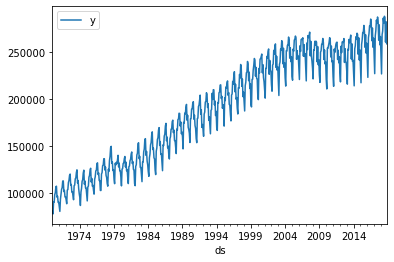

In [8]:
df.plot(x='ds',y='y')

In [10]:
len(df)

588

In [11]:
train = df.iloc[:576]
test = df.iloc[576:]


In [12]:
m = Prophet()

In [13]:
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=12,freq='MS')

In [15]:
forecast = m.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94181.559784,69686.387567,81262.325944,94181.559784,94181.559784,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,-18599.797646,0.0,0.0,0.0,75581.762139
1,1970-02-01,94493.496722,61615.557086,73105.003502,94493.496722,94493.496722,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,-27108.834612,0.0,0.0,0.0,67384.662111
2,1970-03-01,94775.246215,88887.289035,100516.810519,94775.246215,94775.246215,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,-36.299658,0.0,0.0,0.0,94738.946557
3,1970-04-01,95087.183153,89450.620198,100540.225073,95087.183153,95087.183153,27.606045,27.606045,27.606045,27.606045,27.606045,27.606045,0.0,0.0,0.0,95114.789197
4,1970-05-01,95389.057609,99376.322554,110838.907583,95389.057609,95389.057609,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,9610.744015,0.0,0.0,0.0,104999.801624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2018-08-01,263557.251253,274430.034732,285733.694417,263506.532058,263600.655622,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,16443.515456,0.0,0.0,0.0,280000.766709
584,2018-09-01,263701.749361,255776.464842,267974.359500,263614.600224,263783.949373,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,-1675.833952,0.0,0.0,0.0,262025.915409
585,2018-10-01,263841.586239,262766.534859,274904.301662,263720.607578,263955.730076,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,5293.167898,0.0,0.0,0.0,269134.754137
586,2018-11-01,263986.084347,249653.253390,261374.616846,263815.182519,264141.022227,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,-8218.559465,0.0,0.0,0.0,255767.524882


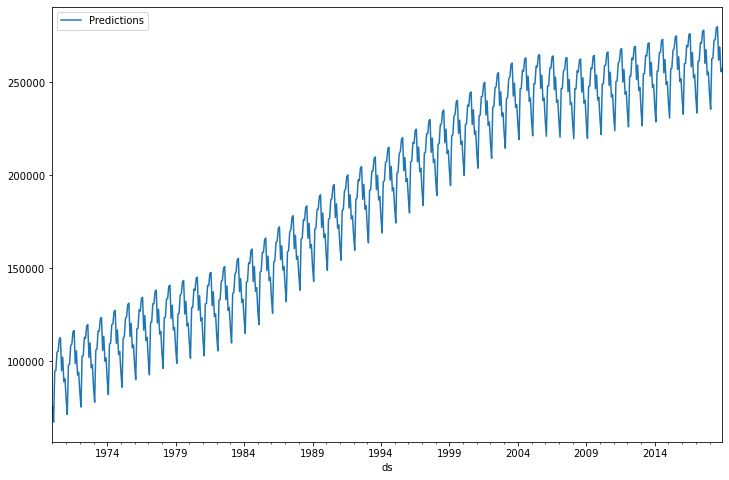

In [21]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

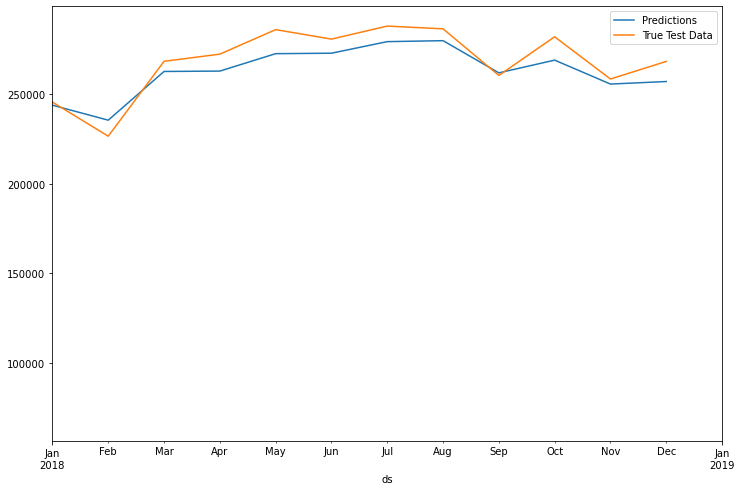

In [23]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
predictions = forecast.iloc[-12:]['yhat']

In [26]:
predictions

576    243969.272997
577    235604.734139
578    262807.783513
579    263016.187323
580    272739.162173
581    272999.948918
582    279459.160887
583    280000.766709
584    262025.915409
585    269134.754137
586    255767.524882
587    257193.315841
Name: yhat, dtype: float64

In [27]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [28]:
rmse(predictions,test['y'])

8524.084735454997

In [29]:
test.mean()

<ipython-input-29-a428e52fa3ce>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.mean()


y    268739.666667
dtype: float64

In [30]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [33]:
#Initial
initial =  5*365 # no.of days in 5 years
initial = str(initial) + ' days'

In [34]:
initial

'1825 days'

In [35]:
##Period
period = 5 * 365
period = str(period) +' days'

In [36]:
period

'1825 days'

In [37]:
#Horizon --> HOW far you want to forecast   
# forecasting for 1 year ahead

horizon = 365
horizon = str(horizon) +' days'

In [38]:
horizon

'365 days'

In [39]:
df_cv = cross_validation(m,initial=initial,period=period,horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [42]:
#cross validation df
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087397,106993.555707,109836.237089,102445.0,1976-12-11
1,1977-02-01,102996.111518,101477.465295,104445.549934,102416.0,1976-12-11
2,1977-03-01,118973.318133,117440.208069,120371.652436,119960.0,1976-12-11
3,1977-04-01,120612.923726,119113.488158,122179.497684,121513.0,1976-12-11
4,1977-05-01,127883.031847,126390.288912,129269.133867,128884.0,1976-12-11


In [43]:
len(df_cv)

108

In [44]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.440480e+07,4940.121674,4543.226142,0.027839,0.023430,0.4
1,53 days,2.189073e+07,4678.753115,4275.518107,0.025071,0.023430,0.4
2,54 days,1.845424e+07,4295.839617,3751.881988,0.020184,0.022341,0.5
3,55 days,2.353986e+07,4851.789757,4286.500962,0.023332,0.023430,0.4
4,57 days,2.121071e+07,4605.508636,4011.466093,0.021541,0.022341,0.5
...,...,...,...,...,...,...,...
94,360 days,1.844636e+07,4294.922982,3768.283191,0.019668,0.019608,0.5
95,361 days,1.755041e+07,4189.321092,3487.275332,0.018267,0.019006,0.5
96,362 days,3.171401e+07,5631.519540,4404.117322,0.022028,0.024617,0.4
97,364 days,3.002471e+07,5479.480904,4245.018294,0.021435,0.021653,0.5


C:\Users\Arvind\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Arvind\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


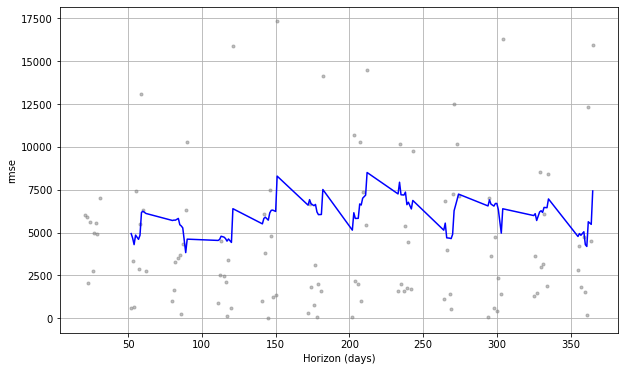

In [46]:
plot_cross_validation_metric(df_cv,metric='rmse');

C:\Users\Arvind\anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Arvind\anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


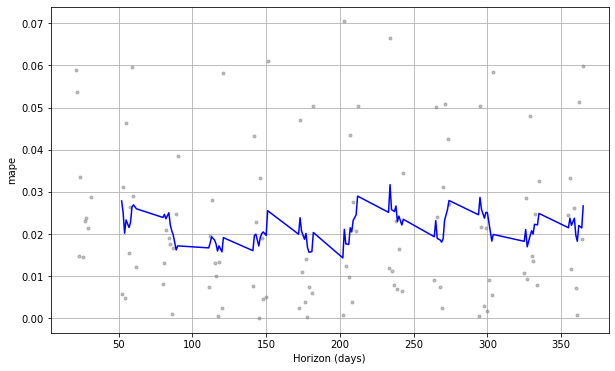

In [47]:
plot_cross_validation_metric(df_cv,metric='mape');